# Business Understanding

Safaricom's procurement function spans multiple departments, suppliers, and categories — often with varying levels of spend control and oversight. In today’s competitive and cost-sensitive environment, the CFO and leadership team require actionable insights into where money is going, who is spending it, and whether that spend is aligned with strategic priorities such as efficiency, digital transformation, and sustainability.

The goal is to establish a data-driven procurement intelligence system that:

Tracks purchase order (PO) trends over time,

Identifies cost-saving levers,

Highlights supplier performance and risk,

Supports proactive, not reactive, financial decisions.



# Problem Statement

Despite extensive procurement activity, the current visibility into spend data is fragmented and lacks granularity. Key challenges include:

1. Inconsistent classification of spend categories

2. Lack of consolidated supplier insights and trend tracking,

3. Difficulty comparing actual spend versus budget due to missing baseline alignment,

4. No forward-looking spend forecast or variance explanation.

## Objectives


1.	Determine the total spend during the review period

2. Perform monthly trend analysis to highlight spikes or anomalies

3.	Estimate future spending using current trends

4.	Recommend cost-saving opportunities

5.	Evaluate strategic alignment of spend with business goals

# Data Understanding


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import string
import nltk
import json
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import  TfidfVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from prophet import Prophet  
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans 


import warnings
warnings.filterwarnings("ignore")

C:\Users\Mich\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Loading dataset
df = pd.read_excel("Data\Working Data.xlsx")
df.head()

,OU Name,PO,Month,PO/Release creation method,Supplier/Vendor,Item Description,Main category,Sub-category,Product Type,Product Name,...,Item,Financial Year,VF Support Type,Project Number,Project Name,Sourcing Project Name,VF Billable,Department,Division,Expenditure Type
0,MPESA Foundation,1358,2024-08-01,Manual,FF,return airport transfers in Nairobi,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,DOMESTIC FLIGHTS,...,NaN,FY 2024/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opex
1,MPESA Foundation,1359,2024-08-01,Manual,OOOOOOOOP,Accomodation for foundation team during offsit...,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,DOMESTIC FLIGHTS,...,NaN,FY 2024/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opex
2,MPESA Foundation,1359,2024-08-01,Manual,BNM,C L 2,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,DOMESTIC FLIGHTS,...,NaN,FY 2024/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opex
3,MPESA Foundation,1359,2024-08-01,Manual,FFG,S C,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,DOMESTIC FLIGHTS,...,NaN,FY 2024/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opex
4,MPESA Foundation,1359,2024-08-01,Manual,FFG,Karen Basiye,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,DOMESTIC FLIGHTS,...,NaN,FY 2024/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opex


In [3]:
pd.set_option('display.max_columns',45)

In [4]:
df.shape

(8058, 45)

In [5]:
df.describe()

,PO,Month,Quantity,Unit Price,PO Amount,Savings,Savings %,Initial PO Total,Total Savings,Line,Shipment,Distribution Num,Distribution Ordered Quantity
count,8058.000000,8058,8058.000000,7.942000e+03,8.058000e+03,7.020000e+02,702.000000,1.000000e+01,1.000000e+01,8058.000000,8058.000000,8058.000000,7942.000000
mean,627440.735791,2024-05-29 07:12:49.322412800,759.122101,1.582007e+05,7.028891e+05,1.826261e+04,17.494772,3.423796e+07,6.155952e+06,6.820179,1.041946,1.070985,741.779264
min,371.000000,2024-04-01 00:00:00,0.000000,0.000000e+00,0.000000e+00,5.000000e-02,0.320000,1.118240e+05,0.000000e+00,1.000000,1.000000,1.000000,0.030000
25%,630621.250000,2024-04-01 00:00:00,1.000000,3.500000e+02,2.600000e+03,6.409091e+00,12.000000,3.365189e+06,7.757790e+05,1.000000,1.000000,1.000000,1.000000
50%,631877.000000,2024-06-01 00:00:00,3.000000,2.500000e+03,1.380000e+04,2.726744e+01,14.000000,1.400403e+07,2.765742e+06,3.000000,1.000000,1.000000,3.000000
75%,634062.750000,2024-08-01 00:00:00,16.000000,1.327189e+04,5.675975e+04,5.000000e+02,19.167500,6.244988e+07,6.135619e+06,7.000000,1.000000,1.000000,15.000000
max,634939.000000,2024-09-01 00:00:00,620000.000000,1.617550e+08,1.012500e+09,8.361581e+06,100.000000,1.048350e+08,2.914650e+07,89.000000,12.000000,8.000000,620000.000000
std,53798.934355,NaN,14684.634769,3.232525e+06,1.929449e+07,3.402359e+05,11.065662,3.937671e+07,9.011365e+06,10.903713,0.382992,0.483999,14786.944085


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8058 entries, 0 to 8057
Data columns (total 45 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   OU Name                                                 8058 non-null   object        
 1   PO                                                      8058 non-null   int64         
 2   Month                                                   8058 non-null   datetime64[ns]
 3   PO/Release creation method                              8058 non-null   object        
 4   Supplier/Vendor                                         8058 non-null   object        
 5   Item Description                                        8058 non-null   object        
 6   Main category                                           8058 non-null   object        
 7   Sub-category                                            8058

# Data Cleaning

In [7]:
df.isna().sum()

OU Name                                                      0
PO                                                           0
Month                                                        0
PO/Release creation method                                   0
Supplier/Vendor                                              0
Item Description                                             0
Main category                                                0
Sub-category                                                 0
Product Type                                                 0
Product Name                                                 0
UOM                                                        116
Currency                                                     0
Quantity                                                     0
Unit Price                                                 116
PO Amount                                                    0
Savings                                                

Text(0.5, 1.0, 'Correlation Heatmap (Numerical Features Only)')

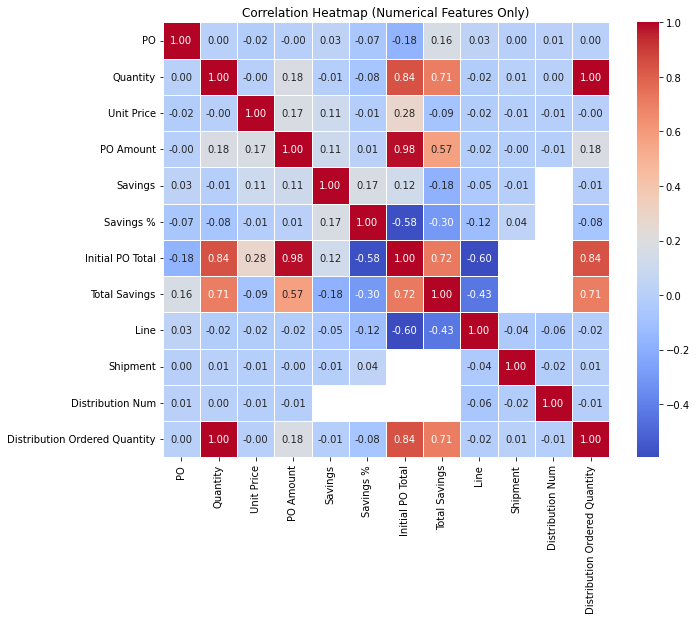

In [8]:
# Correlation matrix to check for the columns with the highest or lowest correlation
numeric_df = df.select_dtypes(include="number")

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")


In [9]:
#percentage of null values
null_percent = (df.isnull().sum() / len(df)) * 100
print(null_percent)

OU Name                                                    0.000000
PO                                                         0.000000
Month                                                      0.000000
PO/Release creation method                                 0.000000
Supplier/Vendor                                            0.000000
Item Description                                           0.000000
Main category                                              0.000000
Sub-category                                               0.000000
Product Type                                               0.000000
Product Name                                               0.000000
UOM                                                        1.439563
Currency                                                   0.000000
Quantity                                                   0.000000
Unit Price                                                 1.439563
PO Amount                                       

In [10]:
# Dropping all columns that has more than 90% missing values
df = df.loc[:, df.isnull().mean() < 0.9]


In [11]:
df = df.dropna(subset=['UOM', 'Unit Price', 'Distribution Ordered Quantity'])
df.dropna(inplace=True)

In [12]:
df.head()

,OU Name,PO,Month,PO/Release creation method,Supplier/Vendor,Item Description,Main category,Sub-category,Product Type,Product Name,UOM,Currency,Quantity,Unit Price,PO Amount,Addressable or Non-Addressable,Locale(Foreign or Local based Suppliers),Special Interest Group- Women or Youth Owned Suppliers,Category Manager(s),Buyer,Closure Status,Type,Supplier Site,Line,Shipment,Distribution Num,Distribution Ordered Quantity,Financial Year,Department,Division,Expenditure Type
36,DigiFarm Kenya Limited,1776,2024-08-01,Touchless,FF,Sales Brand Ambassador Transport Allowance,Corprate Services,SALES & MARKETING,BTL ADVERTISING,AGENCY SERVICES - BTL,Each,KES,192.0,200.00,38400.00,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",CLOSED,Goods,NAIROBI,5,1,1,192.0,FY 2024//25,DigiFarm Kenya Ltd,Business Development Cluster,opex
37,DigiFarm Kenya Limited,1777,2024-08-01,Touchless,LLLKKJJJ,Digifarm Buyer Platform Activations BA wages J...,Corprate Services,SALES & MARKETING,SALES PROMOTIONS,SALES ACTIVATION,Each,KES,1.0,43920.00,43920.00,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",CLOSED,Services,NAIROBI,1,1,1,1.0,FY 2024//25,DigiFarm Kenya Ltd,Business Development Cluster,opex
38,DigiFarm Kenya Limited,1779,2024-08-01,Touchless,FF,Kericho Kisumu Nandi Visits Accommodation Requ...,Corprate Services,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,ACCOMMODATION,Each,KES,1.0,5508.47,5508.47,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",OPEN,Services,NAIROBI,1,1,1,1.0,FY 2024//25,DigiFarm Kenya Ltd,Business Development Cluster,opex
39,DigiFarm Kenya Limited,1779,2024-08-01,Touchless,FF,Catering levy 2,Corprate Services,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,ACCOMMODATION,Each,KES,3.0,110.17,330.51,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",OPEN,Services,NAIROBI,2,2,1,3.0,FY 2024//25,DigiFarm Kenya Ltd,Business Development Cluster,opex
40,DigiFarm Kenya Limited,1782,2024-08-01,Touchless,AA,Digifarm Talent Discounted Rate Android Web fl...,IT.,IT INFRASTRUCTURE,IT MAINTENANCE & SUPPORT,IT INFRASTRUCTURE SOFTWARE SUPPORT,Each,KES,132.0,20454.55,2700000.60,Addressable,Local,Others,OKUMU,"Karanja, Mrs. Maryanne",OPEN,Services,Off USIU Road,1,1,1,132.0,FY 2024//25,DigiFarm Kenya Ltd,Business Development Cluster,opex


In [13]:
df.isna().sum()

OU Name                                                   0
PO                                                        0
Month                                                     0
PO/Release creation method                                0
Supplier/Vendor                                           0
Item Description                                          0
Main category                                             0
Sub-category                                              0
Product Type                                              0
Product Name                                              0
UOM                                                       0
Currency                                                  0
Quantity                                                  0
Unit Price                                                0
PO Amount                                                 0
Addressable or Non-Addressable                            0
Locale(Foreign or Local based Suppliers)

In [14]:
df['Unit Price'].dropna(inplace=True)
df['PO Amount'].dropna(inplace=True)

In [15]:
df['Department'] = df['Department'].fillna('Unknown')
df['Division'] = df['Division'].fillna('Unknown')

In [16]:
df.duplicated().sum()

0

In [17]:
# Check for entry variants
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: OU Name
['DigiFarm Kenya Limited' 'M-PESA AFRICA LIMITED'
 'M-PESA SA (PTY) Limited' 'Safaricom' 'Safaricomm' 'Safaricom.']
----------------------------------------
Column: PO/Release creation method
['Touchless' 'Autocreate']
----------------------------------------
Column: Supplier/Vendor
['FF' 'LLLKKJJJ' 'AA' 'OOOOOOOOP' 'DD' 'VGJ' 'PLK' 'FFG' 'BNG' 'BVGT'
 'ZZZZZZZZZZZZ' 'LLLLLLLL' 'BNM' 'DFH' 'VBN' 'MMJ' 'ZZZZ' 'FGT' 'HJ' 'CFG'
 'VBYI' 'BHJP' 'CVGHJ' 'HH' 'VGHKKL' 'CVB' 'BN' 'YPY' 'GBJJKKPP' 'VBBKKLL'
 'CVD' 'KK' 'TYU' 'GHJ' 'FCH' 'FG' 'DF' 'RTIO' 'JKL' 'HJKL' 'YOU' 'WE'
 'FRTY' 'KLP' 'NMJ' 'BHJ' 'GFF' 'BHHY' 'CVXXXXX' 'DFG' 'RTY' 'GHKL' 'LLK'
 'ZZZCG' 'BBBBBBBB' 'FCV']
----------------------------------------
Column: Item Description
['Sales Brand Ambassador Transport Allowance'
 'Digifarm Buyer Platform Activations BA wages July 2024 Agency fee 10 '
 'Kericho Kisumu Nandi Visits Accommodation Request for Peter Kagechu 6th Aug 2024 Taidys Hotel'
 ... 'Sankara Hotel Cateri

In [18]:
df['OU Name'] = df['OU Name'].str.strip().replace({
    'Safaricomm': 'Safaricom',
    'Safaricom.': 'Safaricom'
})

In [19]:
df['Main category'] = df['Main category'].str.upper().str.replace(r'[.]$', '', regex=True).str.strip()
df['Main category'] = df['Main category'].replace({
    'CORPORATE SERVICESS': 'CORPORATE SERVICES',
    'CORPORATE SERVICE': 'CORPORATE SERVICES',
    'CORPORATE SERVICES.': 'CORPORATE SERVICES',
    'CORPRATE SERVICES': 'CORPORATE SERVICES',
    'CORPORATE Services': 'CORPORATE SERVICES',
    'TECHNOLOGY NETWORKSS': 'TECHNOLOGY NETWORKS'
})

In [20]:
df['Expenditure Type'] = df['Expenditure Type'].str.lower().str.strip()
df['Expenditure Type'] = df['Expenditure Type'].replace({
    'capexx': 'capex',
    'opex': 'opex',
    'Opex': 'opex',
    'Capex': 'capex'
})

In [21]:
df['Financial Year'] = df['Financial Year'].str.replace('//', '/').str.strip()

In [22]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: OU Name
['DigiFarm Kenya Limited' 'M-PESA AFRICA LIMITED'
 'M-PESA SA (PTY) Limited' 'Safaricom']
----------------------------------------
Column: PO/Release creation method
['Touchless' 'Autocreate']
----------------------------------------
Column: Supplier/Vendor
['FF' 'LLLKKJJJ' 'AA' 'OOOOOOOOP' 'DD' 'VGJ' 'PLK' 'FFG' 'BNG' 'BVGT'
 'ZZZZZZZZZZZZ' 'LLLLLLLL' 'BNM' 'DFH' 'VBN' 'MMJ' 'ZZZZ' 'FGT' 'HJ' 'CFG'
 'VBYI' 'BHJP' 'CVGHJ' 'HH' 'VGHKKL' 'CVB' 'BN' 'YPY' 'GBJJKKPP' 'VBBKKLL'
 'CVD' 'KK' 'TYU' 'GHJ' 'FCH' 'FG' 'DF' 'RTIO' 'JKL' 'HJKL' 'YOU' 'WE'
 'FRTY' 'KLP' 'NMJ' 'BHJ' 'GFF' 'BHHY' 'CVXXXXX' 'DFG' 'RTY' 'GHKL' 'LLK'
 'ZZZCG' 'BBBBBBBB' 'FCV']
----------------------------------------
Column: Item Description
['Sales Brand Ambassador Transport Allowance'
 'Digifarm Buyer Platform Activations BA wages July 2024 Agency fee 10 '
 'Kericho Kisumu Nandi Visits Accommodation Request for Peter Kagechu 6th Aug 2024 Taidys Hotel'
 ... 'Sankara Hotel Catering Levy'
 'Field detailed 

In [23]:
df.shape

(5726, 31)

In [24]:
# Outliers
numeric_df =df.select_dtypes(include = ['number'])

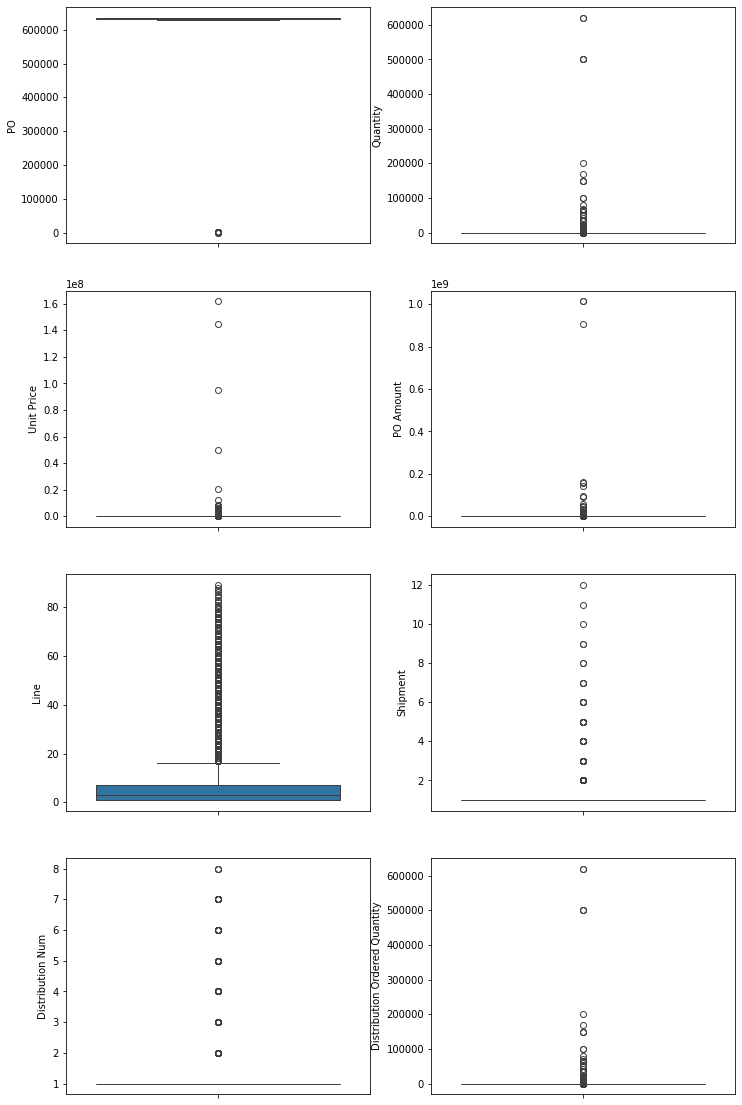

In [25]:
#calculate the number of fig to fit height
grid=(numeric_df.shape[1]+1)//2
#allocating each plot a height of 5
plt.figure(figsize=(12, grid * 5))

count=0
for col in numeric_df:
    count += 1
    plt.subplot(grid,2,count)
    sns.boxplot(y=df[col])


In [26]:
# Removing Outliers
for col in numeric_df:
    q1= df[col].quantile(0)
    q3 = df[col].quantile(0.53)
    # calculating iqr
    iqr = q3 - q1

    #defining lower and upper bound
    upper= q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # removing outliers
    df = df[(df[col] >= lower) & (df[col] <= upper)]


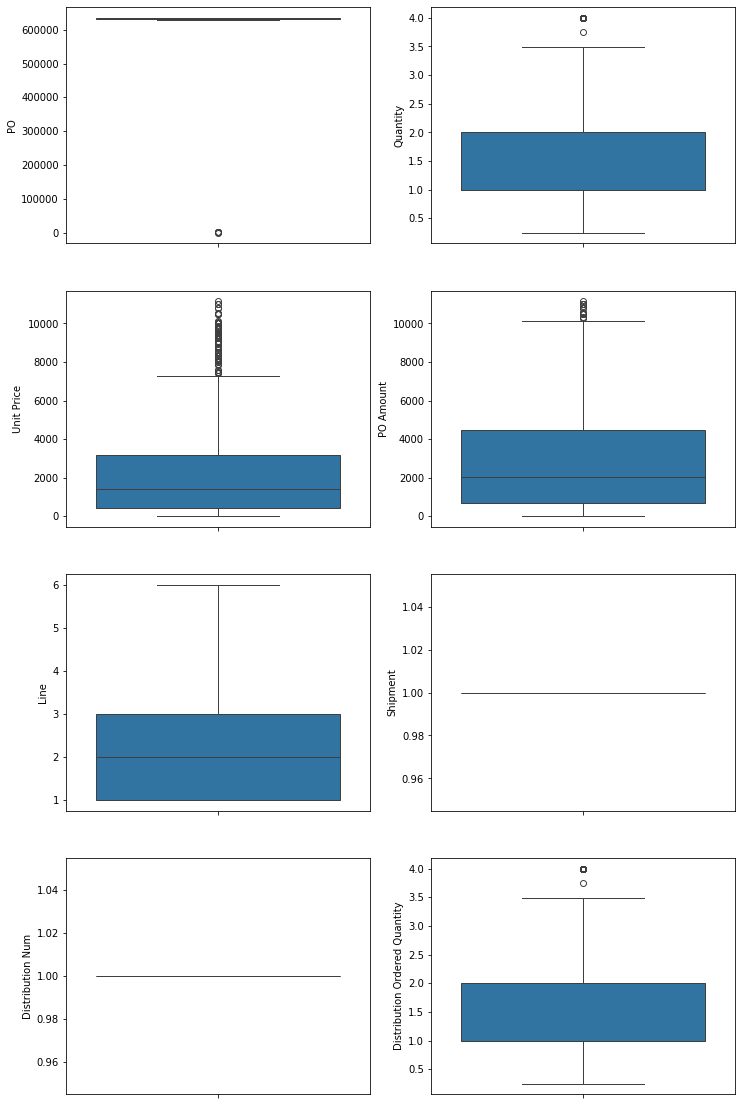

In [27]:
#calculate the number of fig to fit height
grid=(numeric_df.shape[1]+1)//2
#allocating each plot a height of 5
plt.figure(figsize=(12, grid * 5))

count=0
for col in numeric_df:
    count += 1
    plt.subplot(grid,2,count)
    sns.boxplot(y=df[col])


In [28]:
df.shape

(1172, 31)

## Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

### Univariate Analysis

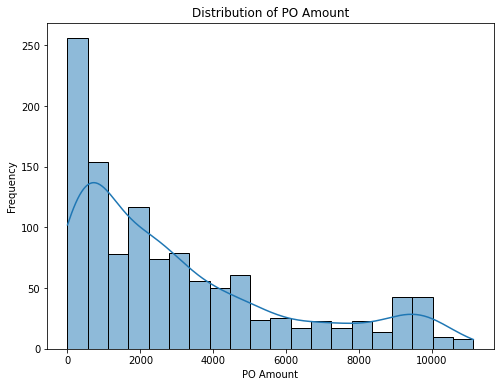

In [30]:
#PO Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['PO Amount'], bins=20, kde=True)
plt.xlabel('PO Amount')
plt.ylabel('Frequency')
plt.title('Distribution of PO Amount')
plt.show()

The bulk of purchase orders fall below Ksh 5,000, suggesting many small-value transactions. We also have fewer, high value transactions beyond Ksh 20,000.

### Bivariate analysis

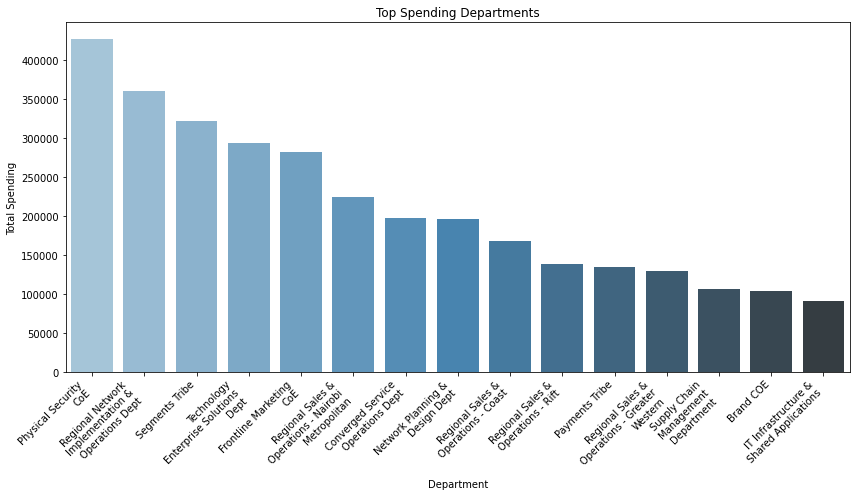

In [31]:
#top spending departments
top_departments = df.groupby('Department')['PO Amount'].sum().nlargest(15)
labels = ['\n'.join(textwrap.wrap(dept, 20)) for dept in top_departments.index]
plt.figure(figsize=(12, 7))
sns.barplot(x=labels, y=top_departments.values, palette="Blues_d")
plt.xlabel('Department')
plt.ylabel('Total Spending')
plt.title('Top Spending Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The unknown category contributes the largest share of spending, over Ksh 12M. This may indicate missing or unclassified data.Major spenders include:
Physical Security COE,Segments Tribe,Regional Network Implementation and  Operations.

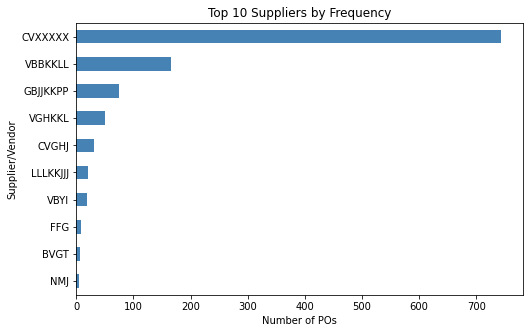

In [32]:
#Supplier frequency
# Get top 10 suppliers by frequency
supplier_counts = df['Supplier/Vendor'].value_counts().head(10)
ax = supplier_counts.plot(kind='barh', figsize=(8, 5), title='Top 10 Suppliers by Frequency', color='steelblue')
plt.xlabel('Number of POs')
plt.ylabel('Supplier/Vendor')
plt.gca().invert_yaxis()
plt.show()

CVXXXXX is the most engaged supplier with over 2,000 interactions, significantly ahead of others. This level of activity suggests a strong relationship but also raises a flag on dependency.

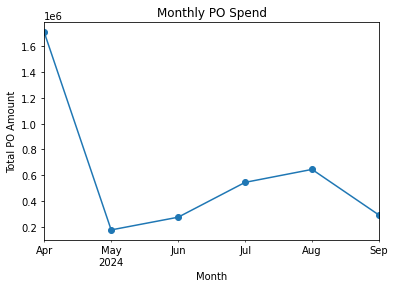

In [33]:
#Monthly trend of PO Amounts
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
monthly = df.groupby(df['Month'].dt.to_period('M'))['PO Amount'].sum()
monthly.plot(kind='line', marker='o', title='Monthly PO Spend')
plt.ylabel('Total PO Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

There is a major spike in PO spending in April 2024, likely tied to year end procurement. Then a dip in May followed by a gradual recovery in June and July.

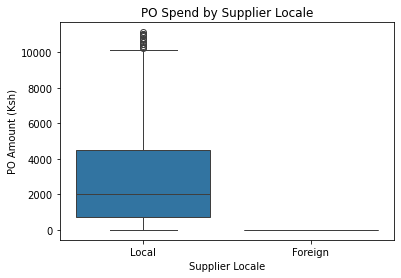

In [34]:
#PO Amount by Supplier Type (Local vs Foreign)
sns.boxplot(data=df, x='Locale(Foreign or Local based Suppliers)', y='PO Amount')
plt.xlabel('Supplier Locale')
plt.ylabel('PO Amount (Ksh)')
plt.title('PO Spend by Supplier Locale')
plt.show()

Foreign suppliers generally receive larger, more consistent PO amounts.Local suppliers handle many small orders and a few very large ones.

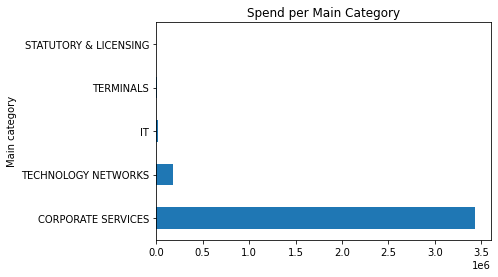

In [35]:
#Spend per Main category
main_cat_spend = df.groupby('Main category')['PO Amount'].sum().sort_values(ascending=False)
main_cat_spend.plot(kind='barh', title='Spend per Main Category')
plt.show()

Corporate Services has the highest spend by far dominating all other categories.Technology Networks, IT, and Terminals have very low spend in comparison.There is a large spending imbalance.

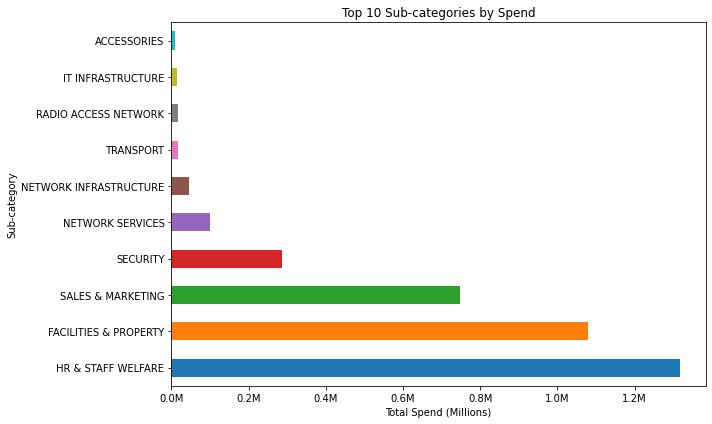

In [36]:
#Spend per Sub-category (top 10
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sub_cat_spend = df.groupby('Sub-category')['PO Amount'].sum().sort_values(ascending=False).head(10)

# Define a color list
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(10, 6))
sub_cat_spend.plot(kind='barh', color=colors, ax=ax)
plt.title('Top 10 Sub-categories by Spend')
plt.xlabel('Total Spend (Millions)')
plt.ylabel('Sub-category')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.tight_layout()
plt.show()


HR & Staff Welfare, Facilities and  Property, and Sales and Marketing,Security dominate spending.

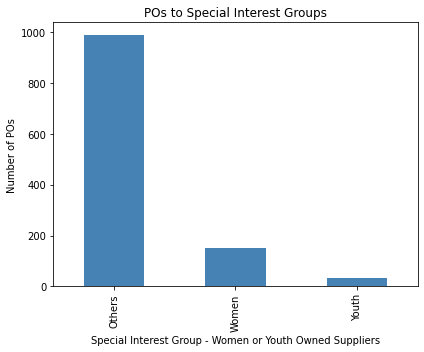

In [37]:
#Spend on Women/Youth-owned businesses
#Prepare data with clean labels
sig_counts = df['Special Interest Group- Women or Youth Owned Suppliers'].fillna('Others')
sig_counts = sig_counts.str.title().value_counts()
fig, ax = plt.subplots(figsize=(6, 5))
bars = sig_counts.plot(kind='bar', color='steelblue', ax=ax)
plt.title('POs to Special Interest Groups')
plt.xlabel('Special Interest Group - Women or Youth Owned Suppliers')
plt.ylabel('Number of POs')
plt.tight_layout()
plt.show()

The majority of POs are going to non-SIG (Others) suppliers.Women-owned suppliers receive a notable share while youth-owned suppliers are significantly underrepresented.

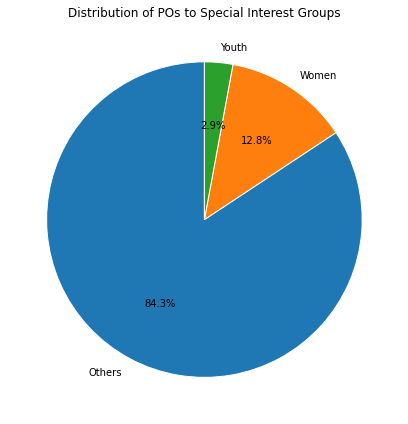

In [38]:
sig_counts = df['Special Interest Group- Women or Youth Owned Suppliers'].fillna('Others')
sig_counts = sig_counts.str.title().value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sig_counts,
    labels=sig_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Optional: custom colors
    wedgeprops=dict(edgecolor='white')
)
ax.set_title('Distribution of POs to Special Interest Groups')
plt.tight_layout()
plt.show()


The majority of purchase orders go to suppliers outside of Special Interest Groups. Women-owned businesses account for 17%, and youth-owned suppliers are significantly underrepresented at just 3%.

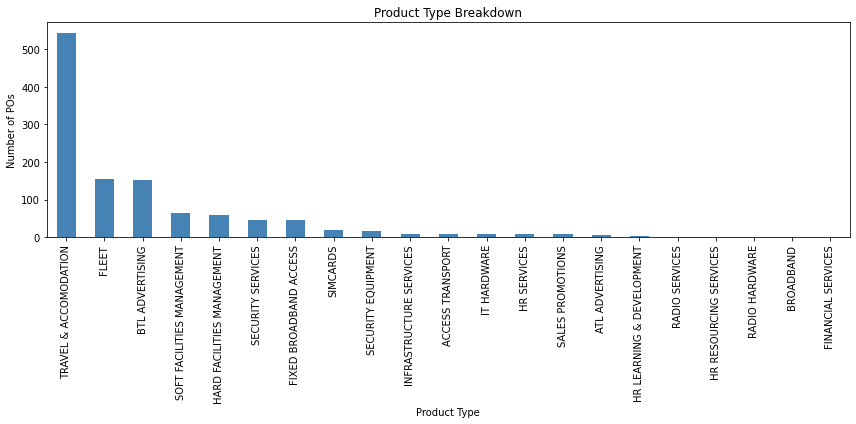

In [39]:
#Product Type breakdown
#Count POs by product type
product_counts = df['Product Type'].fillna('Unknown').value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
product_counts.plot(kind='bar', color='steelblue', ax=ax)
plt.title('Product Type Breakdown')
plt.xlabel('Product Type')
plt.ylabel('Number of POs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Most procurement activities centers around Travel & Accommodation, Advertising, and Facilities Management.

### Multi-Variate analysis

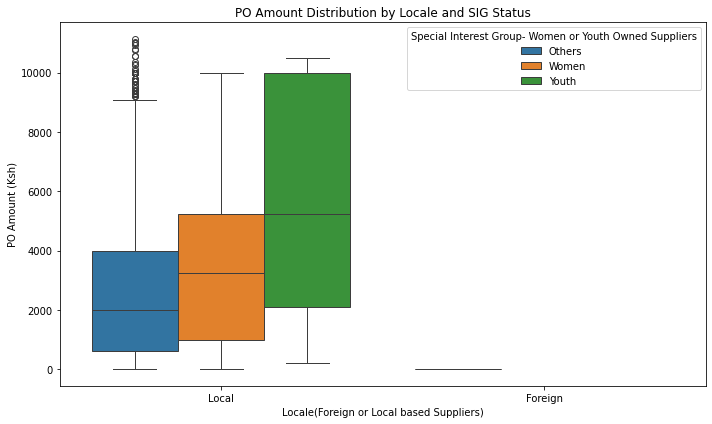

In [40]:
#PO Amount by Locale and SIG Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Locale(Foreign or Local based Suppliers)',
            y='PO Amount',
            hue='Special Interest Group- Women or Youth Owned Suppliers')
plt.title('PO Amount Distribution by Locale and SIG Status')
plt.ylabel('PO Amount (Ksh)')
plt.tight_layout()
plt.show()


This chart highlights a clear value disparity between local SIG suppliers and foreign or non-SIG vendors. While youth-owned suppliers have a higher median spend than women-owned ones, both are still on the lower end compared to others. Foreign suppliers consistently receive higher value POs, possibly due to specialization or contract size.

## Data Preprocessing

### Feature engineering

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 38 to 8042
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   OU Name                                                 1172 non-null   object        
 1   PO                                                      1172 non-null   int64         
 2   Month                                                   1172 non-null   datetime64[ns]
 3   PO/Release creation method                              1172 non-null   object        
 4   Supplier/Vendor                                         1172 non-null   object        
 5   Item Description                                        1172 non-null   object        
 6   Main category                                           1172 non-null   object        
 7   Sub-category                                            1172 non

In [42]:
df.head()

,OU Name,PO,Month,PO/Release creation method,Supplier/Vendor,Item Description,Main category,Sub-category,Product Type,Product Name,UOM,Currency,Quantity,Unit Price,PO Amount,Addressable or Non-Addressable,Locale(Foreign or Local based Suppliers),Special Interest Group- Women or Youth Owned Suppliers,Category Manager(s),Buyer,Closure Status,Type,Supplier Site,Line,Shipment,Distribution Num,Distribution Ordered Quantity,Financial Year,Department,Division,Expenditure Type
38,DigiFarm Kenya Limited,1779,2024-08-01,Touchless,FF,Kericho Kisumu Nandi Visits Accommodation Requ...,CORPORATE SERVICES,HR & STAFF WELFARE,TRAVEL & ACCOMODATION,ACCOMMODATION,Each,KES,1.0,5508.47,5508.47,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",OPEN,Services,NAIROBI,1,1,1,1.0,FY 2024/25,DigiFarm Kenya Ltd,Business Development Cluster,opex
46,M-PESA AFRICA LIMITED,2114,2024-08-01,Autocreate,FF,CREATIVE ACS Waste Managment from April to Jun...,CORPORATE SERVICES,FACILITIES & PROPERTY,SOFT FACILITIES MANAGEMENT,WASTE MANAGEMENT,Each,KES,1.0,1000.00,1000.00,Addressable,Local,Women,Muchiri Thomas,"Mungai, Mr. David Mbugua",CLOSED,Services,NAIROBI,5,1,1,1.0,FY 2024/25,Mpesa Africa Organization,Financial Services Cluster,opex
52,M-PESA AFRICA LIMITED,2125,2024-08-01,Touchless,VGJ,Power Cable Per Meter Twin Flat 1 0MM,CORPORATE SERVICES,SECURITY,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,Each,KES,1.0,150.00,150.00,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",CLOSED,Goods,NAIROBI,1,1,1,1.0,FY 2024/25,Mpesa Africa Organization,Financial Services Cluster,opex
53,M-PESA AFRICA LIMITED,2125,2024-08-01,Touchless,VGJ,Jacks 1pc,CORPORATE SERVICES,SECURITY,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,Each,KES,1.0,50.00,50.00,Addressable,Local,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",CLOSED,Goods,NAIROBI,3,1,1,1.0,FY 2024/25,Mpesa Africa Organization,Financial Services Cluster,opex
58,M-PESA SA (PTY) Limited,372,2024-08-01,Touchless,BNG,PREVOIR PMQ 000660 MPA MFT RTS 2024 2025 OPEX ...,STATUTORY & LICENSING,STATUTORY,INFRASTRUCTURE SERVICES,LICENSES,Each,ZAR,1.0,0.00,0.00,Addressable,Foreign,Others,Muchiri Thomas,"Karanja, Mrs. Maryanne",OPEN,Services,Physical,1,1,1,1.0,FY 2024/25,Mpesa Africa Organization,Financial Services Cluster,opex


In [43]:
# Extract months from the date provided
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [44]:
# Calculating total and average spend by product category, manager, department, month e.t.c.
agg_cols = [
    'OU Name','Type', 'Supplier/Vendor', 'Buyer', 'Category Manager(s)', 'Department',
    'Division', 'Main category', 'Sub-category', 'Expenditure Type'
]

for col in agg_cols:
    # Total spend per category
    total_spend = df.groupby(col)['PO Amount'].sum().rename(f'{col}_Total_Spend')
    df = df.merge(total_spend, on=col, how='left')

    # Average spend per category
    avg_spend = df.groupby(col)['PO Amount'].mean().rename(f'{col}_Avg_Spend')
    df = df.merge(avg_spend, on=col, how='left')


In [45]:
encode_cols = [
    'OU Name', 'PO/Release creation method','Main category',
    'Sub-category', 'UOM', 'Currency','Addressable or Non-Addressable','Locale(Foreign or Local based Suppliers)',
    'Special Interest Group- Women or Youth Owned Suppliers', 'Category Manager(s)',
    'Buyer', 'Type','Department', 'Division',
    'Expenditure Type'
]

In [46]:
df = pd.get_dummies(df, columns=encode_cols, drop_first=True)

In [47]:
df.head()

,PO,Month,Supplier/Vendor,Item Description,Product Type,Product Name,Quantity,Unit Price,PO Amount,Closure Status,Supplier Site,Line,Shipment,Distribution Num,Distribution Ordered Quantity,Financial Year,OU Name_Total_Spend,OU Name_Avg_Spend,Type_Total_Spend,Type_Avg_Spend,Supplier/Vendor_Total_Spend,Supplier/Vendor_Avg_Spend,...,Department_Regional Sales & Operations - Nairobi Metropolitan,Department_Regional Sales & Operations - Rift,Department_Resources Cluster,Department_Segments Tribe,Department_Service Management,Department_Supply Chain Management Department,Department_Technology Enterprise Solutions Dept,Department_Terminals CoE,Division_Business Development Cluster,Division_Channels Cluster,Division_Consumer Business Unit,Division_Consumer Business Unit Cluster,Division_Corporate Affairs Cluster,Division_Corporate Security Cluster,Division_Digital IT,Division_Finance Cluster,Division_Financial Services Cluster,Division_Human Resources Cluster,Division_Network,Division_Technology Cluster,Expenditure Type_direct,Expenditure Type_opex
0,1779,2024-08-01,FF,Kericho Kisumu Nandi Visits Accommodation Requ...,TRAVEL & ACCOMODATION,ACCOMMODATION,1.0,5508.47,5508.47,OPEN,NAIROBI,1,1,1,1.0,FY 2024/25,5508.47,5508.47,1.363869e+06,2800.552136,6508.47,3254.235,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2114,2024-08-01,FF,CREATIVE ACS Waste Managment from April to Jun...,SOFT FACILITIES MANAGEMENT,WASTE MANAGEMENT,1.0,1000.00,1000.00,CLOSED,NAIROBI,5,1,1,1.0,FY 2024/25,1200.00,400.00,1.363869e+06,2800.552136,6508.47,3254.235,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,2125,2024-08-01,VGJ,Power Cable Per Meter Twin Flat 1 0MM,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,1.0,150.00,150.00,CLOSED,NAIROBI,1,1,1,1.0,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,2125,2024-08-01,VGJ,Jacks 1pc,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,1.0,50.00,50.00,CLOSED,NAIROBI,3,1,1,1.0,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,372,2024-08-01,BNG,PREVOIR PMQ 000660 MPA MFT RTS 2024 2025 OPEX ...,INFRASTRUCTURE SERVICES,LICENSES,1.0,0.00,0.00,OPEN,Physical,1,1,1,1.0,FY 2024/25,0.00,0.00,1.363869e+06,2800.552136,0.00,0.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [48]:
# Scaling
numerical_cols = ['Quantity', 'Unit Price', 'PO Amount', 'Distribution Ordered Quantity']
encoders = []
for col in numerical_cols:
    scaler = StandardScaler()
    df[[col]] = scaler.fit_transform(df[[col]])
    encoders.append(scaler)

In [49]:
df.head()

,PO,Month,Supplier/Vendor,Item Description,Product Type,Product Name,Quantity,Unit Price,PO Amount,Closure Status,Supplier Site,Line,Shipment,Distribution Num,Distribution Ordered Quantity,Financial Year,OU Name_Total_Spend,OU Name_Avg_Spend,Type_Total_Spend,Type_Avg_Spend,Supplier/Vendor_Total_Spend,Supplier/Vendor_Avg_Spend,...,Department_Regional Sales & Operations - Nairobi Metropolitan,Department_Regional Sales & Operations - Rift,Department_Resources Cluster,Department_Segments Tribe,Department_Service Management,Department_Supply Chain Management Department,Department_Technology Enterprise Solutions Dept,Department_Terminals CoE,Division_Business Development Cluster,Division_Channels Cluster,Division_Consumer Business Unit,Division_Consumer Business Unit Cluster,Division_Corporate Affairs Cluster,Division_Corporate Security Cluster,Division_Digital IT,Division_Finance Cluster,Division_Financial Services Cluster,Division_Human Resources Cluster,Division_Network,Division_Technology Cluster,Expenditure Type_direct,Expenditure Type_opex
0,1779,2024-08-01,FF,Kericho Kisumu Nandi Visits Accommodation Requ...,TRAVEL & ACCOMODATION,ACCOMMODATION,-0.747629,1.184957,0.810012,OPEN,NAIROBI,1,1,1,-0.743323,FY 2024/25,5508.47,5508.47,1.363869e+06,2800.552136,6508.47,3254.235,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2114,2024-08-01,FF,CREATIVE ACS Waste Managment from April to Jun...,SOFT FACILITIES MANAGEMENT,WASTE MANAGEMENT,-0.747629,-0.500991,-0.709740,CLOSED,NAIROBI,5,1,1,-0.743323,FY 2024/25,1200.00,400.00,1.363869e+06,2800.552136,6508.47,3254.235,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,2125,2024-08-01,VGJ,Power Cable Per Meter Twin Flat 1 0MM,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,-0.747629,-0.818849,-0.996266,CLOSED,NAIROBI,1,1,1,-0.743323,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,2125,2024-08-01,VGJ,Jacks 1pc,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,-0.747629,-0.856244,-1.029974,CLOSED,NAIROBI,3,1,1,-0.743323,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,372,2024-08-01,BNG,PREVOIR PMQ 000660 MPA MFT RTS 2024 2025 OPEX ...,INFRASTRUCTURE SERVICES,LICENSES,-0.747629,-0.874942,-1.046829,OPEN,Physical,1,1,1,-0.743323,FY 2024/25,0.00,0.00,1.363869e+06,2800.552136,0.00,0.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


## Text preprocessing

In [50]:
df[["Item Description"]].sample(7)

,Item Description
947,Serena Beach Service Charge
1147,Nairobi One Way Saloon Airport Transfer 11 21km
440,Alba Hotel Meru Single HB Service Charge
1080,Wheel Alignment Toe KCS 196N Wheel Alignment Toe
214,MSR Security Retainer
301,Catering levy for Hotel accommodation for Debo...
26,Boma Inn Eldoret Single HB Service Charge


In [51]:
df[["Item Description"]].isna().sum()

Item Description    0
dtype: int64

### Lowercasing
Convert all `tweet_text` to lowercase to maintain consistency

In [52]:
df["Item Description Clean"] = df["Item Description"].str.lower()

We did lowercasing to make texts uniform

**Function to handle text processing**

In [53]:
def text_pattern_check(process, pattern):
    def extract_pattern(text):
        if isinstance(text, str):
            return re.findall(pattern, text)
        return []

    # apply pattern extraction
    links_list = df['Item Description Clean'].apply(extract_pattern)

    # flatten the list of lists
    all_links = [link for sublist in links_list for link in sublist]

    # check if anything was found
    if all_links:
        print(f"{process} found in the dataset: {len(all_links)} matches")
        print(all_links[:5])  # optional: show a few samples
    else:
        print(f"No {process} found.")

- Replaced abreviation with its full form so as they won't be removed as stopwords

**Removing pattern function**

In [54]:
def remove_pattern(pattern):
    df["Item Description Clean"] = df["Item Description Clean"].apply(lambda x: re.sub(pattern, '', x))

**Replacing abbreviation with its full form**

In [55]:
# loading abbreviation dictionary from abbr.txt
with open('abbr.txt', 'r') as file:
    abbr_dict = json.load(file)

In [56]:
def check_abbr():
    # Function to check if a text contains any abbreviation
    def contains_abbr(text):
        return any(word in abbr_dict for word in text.split())

    # Filter texts that contain abbreviations
    abbr_text = df[df["Item Description Clean"].apply(contains_abbr)]

    # Check if any were found and print message + examples
    if not abbr_text.empty:
        print("Abbreviations found in some texts. Here are a few examples:")
        print(abbr_text[["Item Description Clean"]].head(5))
    else:
        print("No abbreviations found in any texts.")
check_abbr()


Abbreviations found in some texts. Here are a few examples:
                               Item Description Clean
0   kericho kisumu nandi visits accommodation requ...
1   creative acs waste managment from april to jun...
4   prevoir pmq 000660 mpa mft rts 2024 2025 opex ...
9   electrical cost of led 600x600 light at nanyuk...
18  misc tie wraps insulating tape cable lugs stap...


In [57]:
# expand abbreviations in a tweet
def expand_abbr_in_tweet(text):
    return " ".join([abbr_dict.get(word, word) for word in text.split()])

# apply the function to each tweet in the DataFrame
df["Item Description Clean"] = df["Item Description Clean"].apply(expand_abbr_in_tweet)

In [58]:
check_abbr()

Abbreviations found in some texts. Here are a few examples:
                                Item Description Clean
37   10 agency costfranchise shop launch rift may 2...
252  7 s car esther karuga supplementary public rel...
253  esther karuga supplementary public relations f...
254  2 car logistics esther karuga supplementary pu...
403       agency fee may neon performance appreciation


**Removing Punctuation**

In [59]:
def check_punctuation():
    rows = df[df["Item Description Clean"].apply(lambda x: any(c in string.punctuation for c in x))]
    if not rows.empty:
        print("Punctuation found. Examples:\n", rows["Item Description Clean"].head(5))
    else:
        print("No punctuation found.")

check_punctuation()

Punctuation found. Examples:
 43    mombasa mia one way saloon airport transfer 11...
44    diamonds dream of africa catering levy bcd_tra...
45    diamonds dream of africa service charge bcd_tr...
46    reservation change fee bcd_travel reservation ...
47    nairobi one way saloon airport transfer 11 21k...
Name: Item Description Clean, dtype: object


In [60]:
# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# applying the function to the Item Description column
df["Item Description Clean"] = df["Item Description Clean"].apply(remove_punctuation)

In [61]:
check_punctuation()

No punctuation found.


**Removing Stopwords**

In [62]:
# getting stopwords
stopwords_list = stopwords.words('english')

#removing punctuation from stopwords since punctuation have been removed
stopwords_list= [word.translate(str.maketrans('', '', string.punctuation)) for word in stopwords_list]


In [63]:
for index in range(df["Item Description Clean"].shape[0]):
    text = df["Item Description Clean"].iloc[index].split()
    #removing stopwords from text
    text_no_stopword = " ".join([word for word in text if word not in stopwords_list])
    df["Item Description Clean"].iloc[index] = text_no_stopword

### Tokenization

In [64]:
for index in range(df["Item Description Clean"].shape[0]):
    df["Item Description Clean"].iloc[index] = word_tokenize(df["Item Description Clean"].iloc[index])

### Lemmatization

In [65]:
lemmatizer = WordNetLemmatizer()

for index in range(df["Item Description Clean"].shape[0]):
    text = df["Item Description Clean"].iloc[index]
    text =[lemmatizer.lemmatize(word) for word in text]
    df["Item Description Clean"].iloc[index] = text

In [66]:
# Prepared the text
df['Item Description Clean'] = [" ".join(text) for text in df['Item Description Clean']]


In [67]:
df[["Item Description","Item Description Clean"]]

,Item Description,Item Description Clean
0,Kericho Kisumu Nandi Visits Accommodation Requ...,kericho kisumu nandi visit accommodation reque...
1,CREATIVE ACS Waste Managment from April to Jun...,creative ac waste managment april june 2024 sc...
2,Power Cable Per Meter Twin Flat 1 0MM,power cable per meter twin flat 1 0mm
3,Jacks 1pc,jack 1pc
4,PREVOIR PMQ 000660 MPA MFT RTS 2024 2025 OPEX ...,prevoir pmq 000660 mpa mft return site 2024 20...
...,...,...
1167,RSVP Call Contacters Meal Allowance,rsvp call contacters meal allowance
1168,FTTB config access router BTN 18 7 2024 124820,fttb config access router btn 18 7 2024 124820
1169,Materials Sleeve Anchors 12mm,material sleeve anchor 12mm
1170,FTTB fix the access router in the cabinet,fttb fix access router cabinet


In [68]:
df.to_excel("Data_Clean.xlsx", index=False)

## Vectorizing

In [69]:
df.columns[:30]

Index(['PO', 'Month', 'Supplier/Vendor', 'Item Description', 'Product Type',
       'Product Name', 'Quantity', 'Unit Price', 'PO Amount', 'Closure Status',
       'Supplier Site', 'Line', 'Shipment', 'Distribution Num',
       'Distribution Ordered Quantity', 'Financial Year',
       'OU Name_Total_Spend', 'OU Name_Avg_Spend', 'Type_Total_Spend',
       'Type_Avg_Spend', 'Supplier/Vendor_Total_Spend',
       'Supplier/Vendor_Avg_Spend', 'Buyer_Total_Spend', 'Buyer_Avg_Spend',
       'Category Manager(s)_Total_Spend', 'Category Manager(s)_Avg_Spend',
       'Department_Total_Spend', 'Department_Avg_Spend',
       'Division_Total_Spend', 'Division_Avg_Spend'],
      dtype='object')

In [70]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(df['Item Description'])
tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names())

df = pd.concat([df,tfidf], axis=1)

# Now df contains the embeddings as a new column
df.head(5)

,PO,Month,Supplier/Vendor,Item Description,Product Type,Product Name,Quantity,Unit Price,PO Amount,Closure Status,Supplier Site,Line,Shipment,Distribution Num,Distribution Ordered Quantity,Financial Year,OU Name_Total_Spend,OU Name_Avg_Spend,Type_Total_Spend,Type_Avg_Spend,Supplier/Vendor_Total_Spend,Supplier/Vendor_Avg_Spend,...,with,within,women,wooden,woodlands,work,works,workshop,wraps,wycliffe,x10,x2,x35,x50m,xhp,xpress,ydx,year,yogo,young,youth,yvonne
0,1779,2024-08-01,FF,Kericho Kisumu Nandi Visits Accommodation Requ...,TRAVEL & ACCOMODATION,ACCOMMODATION,-0.747629,1.184957,0.810012,OPEN,NAIROBI,1,1,1,-0.743323,FY 2024/25,5508.47,5508.47,1.363869e+06,2800.552136,6508.47,3254.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2114,2024-08-01,FF,CREATIVE ACS Waste Managment from April to Jun...,SOFT FACILITIES MANAGEMENT,WASTE MANAGEMENT,-0.747629,-0.500991,-0.709740,CLOSED,NAIROBI,5,1,1,-0.743323,FY 2024/25,1200.00,400.00,1.363869e+06,2800.552136,6508.47,3254.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2125,2024-08-01,VGJ,Power Cable Per Meter Twin Flat 1 0MM,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,-0.747629,-0.818849,-0.996266,CLOSED,NAIROBI,1,1,1,-0.743323,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2125,2024-08-01,VGJ,Jacks 1pc,SECURITY EQUIPMENT,SECURITY EQUIPMENT & MAINTENANCE,-0.747629,-0.856244,-1.029974,CLOSED,NAIROBI,3,1,1,-0.743323,FY 2024/25,1200.00,400.00,2.275781e+06,3322.307429,200.00,100.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,372,2024-08-01,BNG,PREVOIR PMQ 000660 MPA MFT RTS 2024 2025 OPEX ...,INFRASTRUCTURE SERVICES,LICENSES,-0.747629,-0.874942,-1.046829,OPEN,Physical,1,1,1,-0.743323,FY 2024/25,0.00,0.00,1.363869e+06,2800.552136,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELING

## Product Name Categorization

### Logistic Regression

In [71]:
X_train,X_test,y_train,y_test = train_test_split(df['Item Description Clean'],df['Product Name'],test_size=0.2,random_state=42)
vectorizer = TfidfVectorizer(max_features = 1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train_vec,y_train)
y_pred = classifier.predict(X_test_vec)
print(classification_report(y_test,classifier.predict(X_test_vec)))
df["Predicted Product Name"] = classifier.predict(vectorizer.transform(df['Item Description Clean']))


                                     precision    recall  f1-score   support

                      ACCOMMODATION       0.73      1.00      0.84        93
              AGENCY SERVICES - BTL       0.69      0.95      0.80        19
AGENCY SERVICES - EVENTS MANAGEMENT       0.00      0.00      0.00         1
 AGENCY SERVICES - SALES ACTIVATION       0.00      0.00      0.00         2
           AGENCY SERVICES - TRAVEL       0.00      0.00      0.00         1
            ATL PRODUCTION SERVICES       0.00      0.00      0.00         1
                      BOOKING TOOLS       0.00      0.00      0.00         1
                    BTS MAINTENANCE       0.50      1.00      0.67         2
                           CAR HIRE       1.00      1.00      1.00         9
                    CARPENTRY WORKS       1.00      0.75      0.86         4
             CATERING & HOSPITALITY       1.00      0.17      0.29         6
                    DEBT COLLECTION       0.00      0.00      0.00         

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(random_state=42, n_estimators=100)

classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)

print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

                          ACCOMMODATION       0.89      1.00      0.94        93
                  AGENCY SERVICES - BTL       0.75      0.79      0.77        19
    AGENCY SERVICES - EVENTS MANAGEMENT       0.00      0.00      0.00         1
AGENCY SERVICES - EXPERIENTIAL SERVICES       0.00      0.00      0.00         0
     AGENCY SERVICES - SALES ACTIVATION       0.00      0.00      0.00         2
               AGENCY SERVICES - TRAVEL       0.00      0.00      0.00         1
                ATL PRODUCTION SERVICES       1.00      1.00      1.00         1
                          BOOKING TOOLS       1.00      1.00      1.00         1
                        BTS MAINTENANCE       0.67      1.00      0.80         2
                               CAR HIRE       1.00      1.00      1.00         9
                        CARPENTRY WORKS       1.00      1.00      1.00         4
                 CATERING &

### XGBoost Classifier

In [73]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 
 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
classifier.fit(X_train_vec, y_train_encoded)

y_pred_encoded = classifier.predict(X_test_vec)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print(classification_report(y_test, y_pred))


                                         precision    recall  f1-score   support

                          ACCOMMODATION       0.91      0.98      0.94        93
                  AGENCY SERVICES - BTL       0.71      0.79      0.75        19
    AGENCY SERVICES - EVENTS MANAGEMENT       0.00      0.00      0.00         1
AGENCY SERVICES - EXPERIENTIAL SERVICES       0.00      0.00      0.00         0
     AGENCY SERVICES - SALES ACTIVATION       0.00      0.00      0.00         2
               AGENCY SERVICES - TRAVEL       0.00      0.00      0.00         1
                ATL PRODUCTION SERVICES       1.00      1.00      1.00         1
                          BOOKING TOOLS       1.00      1.00      1.00         1
                        BTS MAINTENANCE       0.50      1.00      0.67         2
                               CAR HIRE       1.00      0.89      0.94         9
                        CARPENTRY WORKS       1.00      1.00      1.00         4
                 CATERING &

### Feedforward neural network

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([y_train, y_test], axis=0))

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

num_classes = len(label_encoder.classes_)


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train_vec.toarray(), y_train_cat, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

y_pred_probs = nn_model.predict(X_test_vec.toarray())
y_pred_classes = y_pred_probs.argmax(axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

print(classification_report(y_test, y_pred_labels))



Epoch 1/50
27/27 [==============================] - 1s 19ms/step - loss: 3.7699 - accuracy: 0.2977 - val_loss: 3.4531 - val_accuracy: 0.3723
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 2.8615 - accuracy: 0.3654 - val_loss: 2.3103 - val_accuracy: 0.3723
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 2.1057 - accuracy: 0.3974 - val_loss: 1.8915 - val_accuracy: 0.5319
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 1.6848 - accuracy: 0.5647 - val_loss: 1.4944 - val_accuracy: 0.6383
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 1.3015 - accuracy: 0.7082 - val_loss: 1.1697 - val_accuracy: 0.7553
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 1.0062 - accuracy: 0.7651 - val_loss: 0.9369 - val_accuracy: 0.7766
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.7943 - accuracy: 0.8327 - val_loss: 0.7734 - val_accuracy: 0.8511
Epoch 8/50
27/27 [=

## SAMPLE PROTOTYPE

In [ ]:
from pulp import *
df['PO Amount'] = encoders[2].inverse_transform(df['PO Amount'])
df['Quantity'] = encoders[0].inverse_transform(df['Quantity'])
df['Unit Price'] = encoders[1].inverse_transform(df['Unit Price'])
# --- Step 1: Ask for user input ---
# Example (use appropriate preprocessing to match training

user_input = input("Enter product description or relevant text: ")
user_vec = vectorizer.transform([user_input])  # must match training vectorizer

predicted_prob = nn_model.predict(user_vec.toarray())
predicted_class = predicted_prob.argmax(axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)[0] 

# --- Step 1: Ask for user input ---
product_name = predicted_label

try:
    budget = float(input("Enter your available budget: "))
except ValueError:
    print("Invalid budget input. Please enter a number.")
    exit()

# --- Step 2: Filter data ---
acc_df = df[['Month','Supplier Site','Supplier/Vendor','Unit Price','Quantity','PO Amount']]
acc_df = acc_df[df['Product Name'] == product_name]

# Fill missing unit prices
acc_df['Unit Price'] = acc_df['Unit Price'].fillna(acc_df['PO Amount'] / acc_df['Quantity'])

# Reset index to ensure alignment
acc_df = acc_df.reset_index(drop=True)

# --- Step 3: Build optimization model ---
model = LpProblem("Maximize_Quantity_Under_Budget", LpMaximize)

# Create decision variables
acc_df['Decision_Var'] = [
    LpVariable(f'x_{i}', lowBound=0, upBound=int(row['Quantity']), cat='Integer')
    for i, row in acc_df.iterrows()
]

# Objective: Maximize total quantity
model += lpSum(acc_df['Decision_Var']), "Total_Quantity"

# Constraint: Total cost ≤ budget
model += lpSum(acc_df['Decision_Var'][i] * acc_df['Unit Price'][i] for i in acc_df.index) <= budget

# --- Step 4: Solve ---
model.solve()

# --- Step 5: Output results ---
acc_df['Purchased_Quantity'] = [v.varValue for v in acc_df['Decision_Var']]
acc_df['Spent'] = acc_df['Purchased_Quantity'] * acc_df['Unit Price']

# Only keep rows where some quantity was purchased
acc_df = acc_df[acc_df['Purchased_Quantity'] > 0]

# Sort and show top 5 results
top5 = acc_df.sort_values(by='Purchased_Quantity', ascending=False).head(5)

print(f"\nOptimization Status: {LpStatus[model.status]}")
print(f"Total Quantity Purchased: {value(model.objective):.2f}")
print(f"Total Cost: {top5['Spent'].sum():.2f}\n")

print("Top "+ str(top5.shape[0])+" supplier options based on optimized quantity:")
print(top5[['Supplier/Vendor', 'Unit Price', 'Quantity', 'Purchased_Quantity', 'Spent']])


Enter product description or relevant text: accommodation
1/1 [==============================] - 0s 44ms/step
